In [1]:
from torch.utils.data import DataLoader
from torchvision import datasets, models
from utils import *

In [2]:
log_to_stdout()

In [3]:
batch_size = 16
loss_fn = nn.CrossEntropyLoss()

In [ ]:
training_data = datasets.ImageNet(
    root='data.nosync',
    split='train',
    transform=models.ResNet50_Weights.DEFAULT.transforms(),
)

In [4]:
test_data = datasets.ImageNet(
    root='data.nosync',
    split='val',
    transform=models.ResNet50_Weights.DEFAULT.transforms(),
)

In [11]:
scaler = inv_imgnet_scaling()

In [22]:
train_dataloader = DataLoader(training_data, batch_size, True)
test_dataloader = DataLoader(test_data, batch_size, True)

In [23]:
device = get_device()

2022-11-25 15:20:27,407 INFO: using mps device


In [24]:
model = models.resnet50(models.ResNet50_Weights.DEFAULT, progress=True)

/Users/lukas/miniconda3/envs/torch-env/lib/python3.10/site-packages/torchvision/models/_utils.py:135: UserWarning: Using 'weights' as positional parameter(s) is deprecated since 0.13 and will be removed in 0.15. Please use keyword parameter(s) instead.
  warnings.warn(
Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /Users/lukas/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth
24.5%IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

55.8%IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_r

In [25]:
model.to(device)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [46]:
n = torch.randint(len(training_data), (1,))
print(n)

image, label = training_data[n]

tensor([540276])


('banjo',)


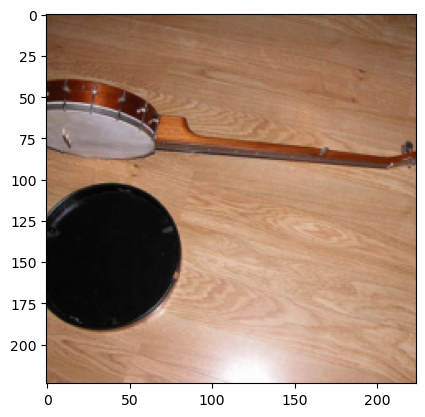

In [47]:
print(training_data.classes[label])
plt.imshow(torch.permute(scaler(image), (1,2,0)))
plt.show()

In [48]:
pred = model(image.unsqueeze(0).to(device))

In [51]:
pred.topk(5, 1), label

/Users/lukas/miniconda3/envs/torch-env/lib/python3.10/site-packages/torch/_tensor_str.py:115: UserWarning: The operator 'aten::masked_select' is not currently supported on the MPS backend and will fall back to run on the CPU. This may have performance implications. (Triggered internally at /Users/runner/work/_temp/anaconda/conda-bld/pytorch_1664176344628/work/aten/src/ATen/mps/MPSFallback.mm:11.)
  nonzero_finite_vals = torch.masked_select(


(torch.return_types.topk(
 values=tensor([[0.7947, 0.7449, 0.6876, 0.6814, 0.6341]], device='mps:0',
        grad_fn=<TopkBackward0>),
 indices=tensor([[756, 412, 876, 899, 792]], device='mps:0')),
 420)